### Pandas Sales Analysis

#### Objective:
    

    
##### - What is overall sales trend?
    
##### - What are the top 10 products by sales?
    
##### - What are the most selling products?
    
##### - What is the most preferred shipping method?
    
##### - Which are the most profitable category and sub-category?
    
    

In [1]:
# Dependencies
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime as dt

<h4> Importing the dataset

In [2]:
df = pd.read_csv("resources/superstore df cleaned.csv", index_col=[0])

<h4> Data Examination

In [3]:
# first 5 rows of dataset
df.head()

,Order ID,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Country,Region,Market,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [4]:
# last five rows of dataset
df.tail()

,Order ID,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Country,Region,Market,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order Priority
51285,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,Corporate,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium
51286,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,Consumer,Chattanooga,Tennessee,United States,Southern US,USCA,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High
51287,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,Consumer,San Francisco,California,United States,Western US,USCA,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High
51288,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,Home Office,Valinhos,São Paulo,Brazil,South America,LATAM,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium
51289,MX-2013-MC1810093-41416,2013-05-22,2013-05-26,Second Class,Consumer,Tipitapa,Managua,Nicaragua,Central America,LATAM,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.38,3,0.0,1.80,1.002,High


In [5]:
# shape of dataset
df.shape

(51290, 19)

In [6]:
# columns present in dataset
df.columns

Index(['Order ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Segment', 'City',
       'State', 'Country', 'Region', 'Market', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost', 'Order Priority'],
      dtype='object')

In [7]:
# concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        51290 non-null  object 
 1   Order_Date      51290 non-null  object 
 2   Ship_Date       51290 non-null  object 
 3   Ship_Mode       51290 non-null  object 
 4   Segment         51290 non-null  object 
 5   City            51290 non-null  object 
 6   State           51290 non-null  object 
 7   Country         51290 non-null  object 
 8   Region          51290 non-null  object 
 9   Market          51290 non-null  object 
 10  Category        51290 non-null  object 
 11  Sub_Category    51290 non-null  object 
 12  Product_Name    51290 non-null  object 
 13  Sales           51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Discount        51290 non-null  float64
 16  Profit          51290 non-null  float64
 17  Shipping_Cost   51290 non-null 

In [8]:
# fix date time dtypes in ship date and order date
df['Order_Date']= pd.to_datetime(df['Order_Date'])
df['Ship_Date']= pd.to_datetime(df['Ship_Date'])
df.dtypes

Order ID                  object
Order_Date        datetime64[ns]
Ship_Date         datetime64[ns]
Ship_Mode                 object
Segment                   object
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Category                  object
Sub_Category              object
Product_Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping_Cost            float64
Order Priority            object
dtype: object

<h4> What is the overall sales trend?

In [9]:
df['Order_Date'].min()

Timestamp('2012-01-01 00:00:00')

In [10]:
df['Order_Date'].max()

Timestamp('2015-12-31 00:00:00')

In [11]:
# getting month year from the dataset
df['month_year'] = df["Order_Date"].apply(lambda x: x.strftime('%Y-%m'))

In [12]:
df['month_year']

0        2014-11
1        2014-02
2        2014-10
3        2014-01
4        2014-11
          ...   
51285    2015-06
51286    2014-05
51287    2012-08
51288    2013-02
51289    2013-05
Name: month_year, Length: 51290, dtype: object

In [13]:
# grouping month year 
df_trend = df.groupby('month_year').sum()['Sales'].reset_index()

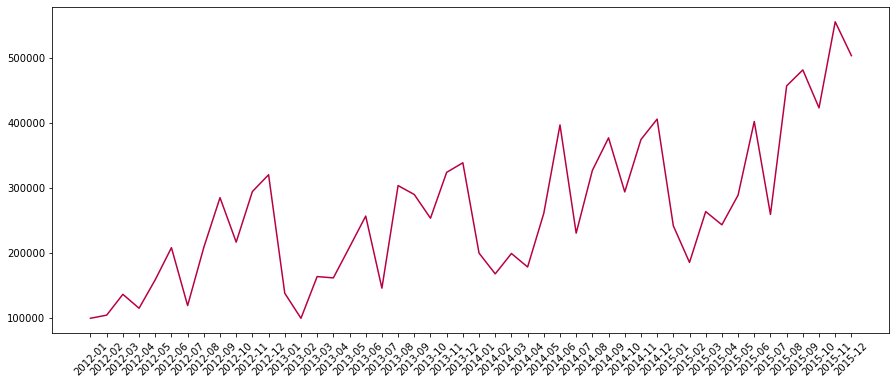

In [14]:
# setting the figure size
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'], df_trend['Sales'], color ='#b80045')
plt.xticks(rotation='45', size=10)
plt.show()

<h4> Which are the top 10 products by sales?

In [15]:
# grouping product name column
prod_sales = pd.DataFrame(df.groupby('Product_Name').sum()['Sales'])

In [16]:
# sorting prod_sales column
prod_sales = prod_sales.sort_values('Sales',ascending=False)

In [17]:
# top 10 products by sales
prod_sales[:10]

,Sales
Product_Name,
"Apple Smart Phone, Full Size",86935.79
"Cisco Smart Phone, Full Size",76441.53
"Motorola Smart Phone, Full Size",73156.33
"Nokia Smart Phone, Full Size",71904.56
Canon imageCLASS 2200 Advanced Copier,61599.83
"Hon Executive Leather Armchair, Adjustable",58193.52
"Office Star Executive Leather Armchair, Adjustable",50661.68
"Harbour Creations Executive Leather Armchair, Adjustable",50121.52
"Samsung Smart Phone, Cordless",48653.46


<h4> What are the most selling products?

In [18]:
# group product name
most_sell_prod = pd.DataFrame(df.groupby('Product_Name').sum()['Quantity'])

In [19]:
# sorting most_sell_products
most_sell_prod.sort_values('Quantity',ascending=False)

,Quantity
Product_Name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
...,...
Penpower WorldCard Pro Card Scanner,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
Boston 1900 Electric Pencil Sharpener,1


In [20]:
most_sell_prod[:10]

,Quantity
Product_Name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",21
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",13
#6 3/4 Gummed Flap White Envelopes,9
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",14


/Users/forrestcasey/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


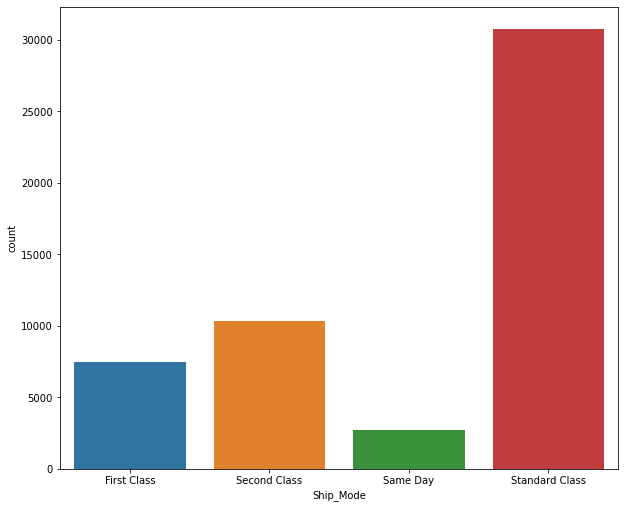

In [21]:
# setting figure size
plt.figure(figsize=(10,8.5))

# plotting shipmode
sns.countplot(df['Ship_Mode'])
plt.show()

<h4> Most profitable category and sub-category?

In [22]:
# grouping category and subcategory
cat_subcat_profit = pd.DataFrame(df.groupby(['Category','Sub_Category']).sum()['Profit'])

In [23]:
# sorting the result
cat_subcat_profit.sort_values(['Category','Profit'],ascending=False)

Profit
Category        Sub_Category           
Technology      Copiers       258567.63
                Phones        216717.44
                Accessories   129626.44
                Machines       58867.70
Office Supplies Appliances    141562.63
                Storage       108416.94
                Binders        72432.92
                Paper          58111.27
                Art            57829.90
                Envelopes      28849.26
                Supplies       22559.04
                Labels         14988.80
                Fasteners      13844.08
Furniture       Bookcases     161924.37
                Chairs        140396.24
                Furnishings    46845.56
                Tables        -64083.55

### Augment data with additional column(s)

### Add month column

In [24]:
df['Month'] = pd.DatetimeIndex(df['Order_Date']).month
df.columns

Index(['Order ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Segment', 'City',
       'State', 'Country', 'Region', 'Market', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost', 'Order Priority', 'month_year', 'Month'],
      dtype='object')

#### Best month for sales? How much was earned from that month?


In [25]:
results = df.groupby('Month').sum()
results.head()

,Sales,Quantity,Discount,Profit,Shipping_Cost
Month,,,,,
1,676789.30,8872,365.122,73440.45,71225.18900
2,554650.21,7429,307.574,72932.18,59878.28000
3,760518.34,10390,432.354,91873.45,76723.92404
4,695978.86,10466,448.146,73822.57,75072.86600
5,915493.24,13196,543.822,106970.07,102015.17500


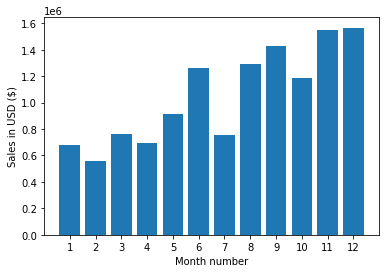

In [26]:
import matplotlib.pyplot as plt

Months = range(1,13)

plt.bar(Months, results['Sales'])
plt.xticks(Months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### What products are most often sold together?

In [27]:
# first we need to make the prod names readable, they are mixed in with their descriptions
# splitting product names from descriptions in Product_Name column
split_df = df['Product_Name'].str.split(",", n = 1, expand = True)

In [37]:
# rename columns
split_df = split_df.rename(columns={0:'Product_Name', 1:'Product_Description'})

In [38]:
# combine new columns into original dataframe
split_df.head()

,Product_Name,Product_Description
0,Samsung Convoy 3,None
1,Novimex Executive Leather Armchair,Black
2,Nokia Smart Phone,with Caller ID
3,Motorola Smart Phone,Cordless
4,Sharp Wireless Fax,High-Speed


In [30]:
# drop previous Product_Name column


In [31]:
# group products most often sold together
# df = df[df['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product_Name'].transform(lambda x: ','.join(x))

grouped = df[['Order ID','Grouped']].drop_duplicates()

grouped.head()

,Order ID,Grouped
0,CA-2014-AB10015140-41954,"Samsung Convoy 3,Sauder Facets Collection Libr..."
1,IN-2014-JR162107-41675,"Novimex Executive Leather Armchair, Black,Brot..."
2,IN-2014-CR127307-41929,"Nokia Smart Phone, with Caller ID,Apple Speake..."
5,IN-2014-JM156557-41818,"Samsung Smart Phone, with Caller ID,Hewlett Fa..."
6,IN-2012-TS2134092-41219,"Novimex Executive Leather Armchair, Adjustable..."


In [32]:
from itertools import combinations
from collections import Counter

In [33]:
count = Counter()

for row in grouped['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,5)))
    
for key, value in count.most_common(10):
    print(key, value)

('Hon Executive Leather Armchair', ' Adjustable', 'Novimex Rocking Chair', ' Black', ' Durable') 6
('Hon Executive Leather Armchair', ' Adjustable', 'Novimex Rocking Chair', 'Motorola Speaker Phone', ' Durable') 6
('Hon Executive Leather Armchair', ' Adjustable', 'Novimex Rocking Chair', ' VoIP', ' Durable') 6
('Hon Executive Leather Armchair', ' Adjustable', 'Novimex Rocking Chair', 'Avery Hole Reinforcements', ' Durable') 6
(' Adjustable', 'Novimex Rocking Chair', ' Black', 'Motorola Speaker Phone', ' Durable') 6
(' Adjustable', 'Novimex Rocking Chair', ' Black', ' VoIP', ' Durable') 6
(' Adjustable', 'Novimex Rocking Chair', ' Black', 'Avery Hole Reinforcements', ' Durable') 6
(' Adjustable', 'Novimex Rocking Chair', 'Motorola Speaker Phone', ' VoIP', ' Durable') 6
(' Adjustable', 'Novimex Rocking Chair', 'Motorola Speaker Phone', 'Avery Hole Reinforcements', ' Durable') 6
(' Adjustable', 'Novimex Rocking Chair', ' VoIP', 'Avery Hole Reinforcements', ' Durable') 6


In [34]:
df['Product_Name'] = pd.DataFrame(df['Product_Name'])

In [35]:
df.head(2)

,Order ID,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Country,Region,Market,...,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order Priority,month_year,Month,Grouped
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014-11,11,"Samsung Convoy 3,Sauder Facets Collection Libr..."
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014-02,2,"Novimex Executive Leather Armchair, Black,Brot..."


### what product sold the most? Why do you think it sold the most

In [36]:
# top 20 countries with top sales
country_sales = pd.DataFrame(df.groupby('Country').sum()['Sales'])
country_sales = country_sales.sort_values(by = 'Sales',ascending=False)
country_sales.head(20)

,Sales
Country,
United States,1773580.06
Australia,688327.15
France,626304.51
China,532260.60
Germany,479113.14
India,448458.49
Mexico,446381.82
United Kingdom,376857.26
Indonesia,299287.89
